In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os 

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('arabic')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('isri')
nltk.download('averaged_perceptron_tagger')
from nltk.stem.isri import ISRIStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import pyarabic.araby as araby
import pyarabic.number as number

import re
import html
import unicodedata as ud
import string
import warnings
warnings.filterwarnings('ignore')

#Dat_preprocssing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from datasets import Dataset

#model
import tensorflow as tf
from tensorflow.keras.layers import LSTM,Bidirectional,Dropout,Dense



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading arabic: Package 'arabic' not found in index
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Error loading isri: Package 'isri' not found in index
[nltk_data] Downloading package averaged_perceptron_tagger to
[

In [2]:
BATCH_SIZE = 64
EPOCHS = 100
LATENT_DIM = 256
NUM_SAMPLES = 10000


In [3]:
FILE_PATH = os.path.join(os.getcwd(),'archive','ara_eng.csv')
df = pd.read_csv(FILE_PATH,sep='\t',names=['English','Arabic'])
df

,English,Arabic
0,Hi.,مرحبًا.
1,Run!,اركض!
2,Help!,النجدة!
3,Jump!,اقفز!
4,Stop!,قف!
...,...,...
24633,rising voices promoting a more linguistically ...,شاركنا تحدي ابداع ميم بلغتك الام تعزيزا للتنوع...
24634,following last year s successful campaign we i...,استكمالا لنجاح حملة العام السابق ندعوكم للمشار...
24635,during last year s challenge we also met langu...,تعرفنا خلال تحدي العام الماضي على ابطال لغويين...
24636,to take part just follow the simple steps outl...,للمشاركة في التحدي اتبع الخطوات الموضحة على ال...


In [4]:
df.shape

(24638, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24638 entries, 0 to 24637
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   English  24638 non-null  object
 1   Arabic   24638 non-null  object
dtypes: object(2)
memory usage: 385.1+ KB


In [6]:
df.isna().sum()

English    0
Arabic     0
dtype: int64

In [7]:
df.duplicated().sum()

231

In [8]:
df[df.duplicated()]

,English,Arabic
11206,this post is part of our special coverage syri...,هذا المقال جزء من تغطيتنا الخاصة للثورة السورية
11642,this post is part of our special coverage syri...,هذا المقال جزء من تغطيتنا الخاصة لثورة سوريا
11746,this post is part of our special coverage syri...,هذا المقال جزء من تغطيتنا الخاصة لثورة سوريا ٢...
11961,this post is part of our special coverage syri...,هذا المقال جزء من تغطيتنا الخاصة ثورة سوريا
12060,donate now.,تبرع الان
...,...,...
24452,digital citizen is a monthly review of news po...,تقرير المواطن الرقمي هو استعراض للاخبار والسيا...
24453,morocco.,المغرب
24456,bahrain.,البحرين
24460,tunisia.,تونس


In [9]:
df.drop_duplicates(inplace=True,keep='first')
df.duplicated().sum()

0

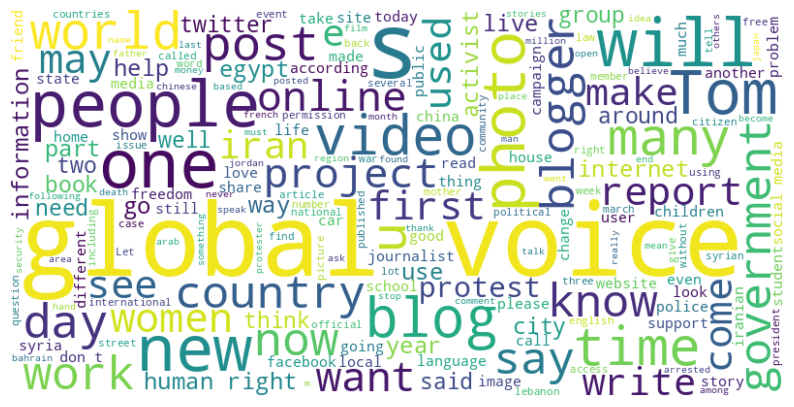

In [10]:
# merge all text in only text to create wordcloude
all_text = ' '.join(df['English'].astype(str))

#to see more repeat word in curpus
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return ud.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()



def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words):
    stop_words = set(stopwords.words('english'))
    return [word for word in words if word not in stop_words]



def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def text2words(text):
  return word_tokenize(text)

#### Functions for Arabic processing ###
def remove_punctuation_AR(text):
    """Remove punctuation from list of tokenized words"""
    return ''.join(c for c in text if not ud.category(c).startswith('P'))

def remove_stopwords_AR(words):
    stop_words = set(stopwords.words('arabic'))
    return [word for word in words if word not in stop_words]

def stem_words_AR(words):
    """Stem words in text"""
    stemmer = ISRIStemmer()
    return [stemmer.stem(word) for word in words]

def text2words_AR(text):
  return araby.tokenize(text)

def normalize_text( text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words)
    words = stem_words(words)


    return ' '.join(words)


def normalize_text_AR( text):
    #text = remove_special_chars(text)
    #text = remove_non_ascii(text)
    text = remove_punctuation_AR(text)
    text = replace_numbers(text)
    words = text2words_AR(text)
    words = remove_stopwords_AR(words)
    words = stem_words_AR(words)
    return ' '.join(words)

In [12]:
df['English'] = df['English'].apply(normalize_text)
df['Arabic'] = df['Arabic'].apply(normalize_text_AR)
df.head()

,English,Arabic
0,hi,رحب
1,run,ركض
2,help,نجد
3,jump,قفز
4,stop,قف


In [13]:
df['English_word_count'] = df['English'].apply(lambda x: len(x.split()))
df['Arabic_word_count'] = df['Arabic'].apply(lambda x: len(x.split()))
df.head()

,English,Arabic,English_word_count,Arabic_word_count
0,hi,رحب,1,1
1,run,ركض,1,1
2,help,نجد,1,1
3,jump,قفز,1,1
4,stop,قف,1,1


In [14]:
df['English_seq_length'] = df['English'].str.len()
df['Arabic_seq_length'] = df['Arabic'].str.len()

In [15]:
df

,English,Arabic,English_word_count,Arabic_word_count,English_seq_length,Arabic_seq_length
0,hi,رحب,1,1,2,3
1,run,ركض,1,1,3,3
2,help,نجد,1,1,4,3
3,jump,قفز,1,1,4,3
4,stop,قف,1,1,4,2
...,...,...,...,...,...,...
24633,rise voic promot linguist divers internet moth...,شرك تحد بدع بلغ الم عزز تنع لغي نرن اصو علم,10,11,70,43
24634,follow last year success campaign invit take p...,استكمالا نجح حمل عام سبق دعو شرك نسخ ثني تحد ب...,36,38,232,162
24635,last year challeng also met languag champion p...,عرف خلل تحد عام اضي بطل لغي شرك حمل بدع يمز بل...,31,35,211,157
24636,take part follow simpl step outlin challeng we...,شرك تحد تبع خطو وضح وقع خاص حمل والتي تضم خير ...,33,32,202,128


In [16]:
max_enc_length = df['English_seq_length'].max()
max_dec_length = df['Arabic_seq_length'].max()
print(f"Maximum English sequence length = {max_enc_length}")
print(f"Maximum Arabic sequence length = {max_dec_length}")

Maximum English sequence length = 754
Maximum Arabic sequence length = 670


In [17]:
input_tokens = [ x for x in df['English'].values]


In [18]:
input_char =[]
for i in range(len(input_tokens)):
    for j in input_tokens[i]:
        if j not in input_char:
            input_char.append(j)

enc_token_length = len(input_char)

In [19]:
target_tokens = [x for x in df['Arabic'].values]
target_chars = []
for i in range(len(target_tokens)):
    for j in target_tokens[i]:
        if j not in target_chars:
            target_chars.append(j)
dec_token_length= len(target_chars)

In [20]:
print("Number of unique input tokens:", enc_token_length)
print("Number of unique output tokens:", dec_token_length)

Number of unique input tokens: 27
Number of unique output tokens: 73


In [49]:
vectorizer_eng = TfidfVectorizer(analyzer='char_wb',min_df=0.01,max_df=0.9,max_features=10000)

x_eng = vectorizer_eng.fit_transform(df['English'])



In [50]:
columns = vectorizer_eng.get_feature_names_out()
x_eng = pd.DataFrame(x_eng.todense(), columns=columns)
x_eng

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.782460,0.622700,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.530225,0.000000,0.000000,0.653597,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.406799,0.000000,0.000000,0.544542,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.736897,...,0.000000,0.000000,0.000000,0.000000,0.391130,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.504445,0.447645,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24402,0.167597,0.000000,0.136198,0.070091,0.430914,0.000000,0.296474,0.144205,0.344286,0.000000,...,0.000000,0.293212,0.191128,0.282679,0.144574,0.168080,0.000000,0.000000,0.000000,0.0
24403,0.377341,0.051086,0.197130,0.045088,0.363823,0.145309,0.190716,0.092764,0.221472,0.000000,...,0.000000,0.320649,0.143440,0.345499,0.209254,0.081092,0.027307,0.000000,0.063700,0.0
24404,0.489701,0.083535,0.214896,0.073728,0.358839,0.063362,0.155928,0.151687,0.201194,0.047752,...,0.061417,0.287863,0.178706,0.158584,0.278805,0.000000,0.089305,0.000000,0.069441,0.0
24405,0.356257,0.029790,0.127726,0.131463,0.363699,0.135576,0.194623,0.162283,0.258297,0.000000,...,0.000000,0.175983,0.191189,0.339323,0.135582,0.063050,0.063696,0.055507,0.000000,0.0


In [51]:
x_train,x_temp,y_train,y_temp = train_test_split(x_eng,df['Arabic'],random_state=42,shuffle=True,test_size=0.3)
x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp,random_state=42,shuffle=True,test_size=0.5)


In [68]:
enc_input = tf.keras.Input(shape=(None,max_enc_length))
encoder = LSTM(LATENT_DIM,return_state=True)
enc_outputs,state_h,state_c = encoder(enc_input)


encoder_states = [state_h,state_c]

decoder_inputs = tf.keras.Input(shape=(None,max_dec_length))

decoder_lstm = LSTM(LATENT_DIM, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(dec_token_length, activation="softmax")
decoder_outputs = decoder_dense(decoder_outputs)


# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = tf.keras.Model([enc_input, decoder_inputs], decoder_outputs)

In [69]:
'''x_train = tf.expand_dims(x_train, axis=-1)
x_test = tf.expand_dims(x_test, axis=-1)
x_val = tf.expand_dims(x_val, axis=-1)'''


'x_train = tf.expand_dims(x_train, axis=-1)\nx_test = tf.expand_dims(x_test, axis=-1)\nx_val = tf.expand_dims(x_val, axis=-1)'

In [74]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((17084, 26), (3662, 26), (17084,), (3662,))

In [71]:
model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)
model.fit(
    x_train,y_train,
    validation_data=(x_val,y_val),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=0.2,
)
# Save model
#model.save("s2s_model.keras")

Epoch 1/100


ValueError: Layer "functional_6" expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'data:0' shape=(None, 26) dtype=float32>]